# <데이터 분석 과제>
- 한국인의 삶
    1. 복지데이터 : Koweps_h17_2022_beta1.dta
    2. 코딩북 : (2022년 17차 한국복지패널조사) 조사설계서-가구용(beta1).xlsx
    3. 데이터파일 읽기
    4. 분석에 필요한 항목명 이름 바꾸기
    5. 데이터 분석에 필요한 변수 검토 및 전처리<br>
        5-1. 이상치 확인 및 처리<br>
        5-2. 변구간 관계 분석
    6. 분석 결과 시각화
    
<br>

- 분석 주제( 1번 가구원 데이터 만 가지고 )
    1. 성별에 따른 월급의 차이
    2. 나이대에 따른 월급의 차이
    3. 연령대별 성별에 따른 월급 차이
    4. 교육 수준에 따른 월급의 차이
    5. 직업별 월급의 차이
    6. 성별 직업 분포는
    7. 종교유무에 따른 이혼율은
    8. 노년층이 많은 지역은
    9. 교육수준과 건강과 관계가 있는가?
    10. 월급과 건강과 관계가 있는가?
    11. 종교와 건강과 관계가 있는가?
    12. 주요 경제활동 참여상태의 비율은?
    13. 직업별 총생활비 지출의 평균은?


### ※ 230926_53부터 한국복지패널 데이터 활용 내용있으니 참고 

In [126]:
# 그래프 그릴때 필요한 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프 글자 출력 오류 해결 
import matplotlib
import matplotlib.font_manager as fm

font_location = 'c:/windows/fonts/H2GTRE.TTF'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family = font_name)

## - dta 파일 읽어오기

In [108]:
import pandas as pd
import numpy as np

data = pd.read_stata('data/Koweps_h17_2022_beta1.dta')

print(data)

       h17_id  h17_ind  h17_sn   h17_merkey  h_new  h_new1  h17_cobf  \
0         2.0      1.0     1.0      20101.0    0.0     0.0       NaN   
1         3.0      1.0     1.0      30101.0    0.0     0.0       NaN   
2         4.0      1.0     1.0      40101.0    0.0     0.0       NaN   
3         6.0      1.0     1.0      60101.0    0.0     0.0       NaN   
4         8.0      1.0     1.0      80101.0    0.0     0.0       NaN   
...       ...      ...     ...          ...    ...     ...       ...   
7860  12007.0     17.0     1.0  120071701.0    2.0     1.0       NaN   
7861  12008.0     17.0     1.0  120081701.0    2.0     1.0       NaN   
7862  12009.0     17.0     1.0  120091701.0    2.0     1.0       NaN   
7863  12010.0     17.0     1.0  120101701.0    2.0     1.0       NaN   
7864  12011.0     17.0     1.0  120111701.0    2.0     1.0       NaN   

        h17_ws       h17_wg  h17_ws_all  ...  h1716_60  h1716_64  h1716_15aq1  \
0     0.414313  1872.512363    0.450460  ...       NaN

## - 분석에 필요한 데이터 정리

h1701_4(성별)<br>
h1701_5(태어난 년 도)<br>
교육수준(h1701_6(학력(초,중,고,대 등)), h1701_7(재학, 휴학 등))<br>
h17_cin(가처분소득)<br> <!-- 12개월 나눠서 월급으로 출력 -->
h1703_8(직종)<br> <!-- 직종코드 파일참고 -->
h1701_12(종교)<br> <!-- 종교 여부 -->
h1701_11(혼인상태)<br> <!-- 이혼은 3번 -->
h1702_2(건강상태)<br> <!-- 1~5까지 1부터는 매우건강 5부터는 매우안좋음 -->

In [109]:
columns = ['h1701_4', 'h1701_5', 'h1701_6', 'h1701_7', 'h17_cin', 'h1703_8', 'h1701_12', 'h1701_11', 'h1702_2']
korea = data[columns]

korea = korea.rename(columns = {'h1701_4' : '성별', 
                                'h1701_5' : '태어난 년 도', 
                                'h1701_6' : '학력', 
                                'h1701_7' : '학력 상태', 
                                'h17_cin' : '가처분소득', 
                                'h1703_8' : '직종', 
                                'h1701_12' : '종교', 
                                'h1701_11' : '혼인상태', 
                                'h1702_2' : '건강상태'})
korea


,성별,태어난 년 도,학력,학력 상태,가처분소득,직종,종교,혼인상태,건강상태
0,2.0,1945.0,4.0,5.0,885.0,NaN,1.0,2.0,4.0
1,1.0,1948.0,3.0,5.0,2884.0,942.0,2.0,2.0,5.0
2,1.0,1942.0,7.0,3.0,2544.0,762.0,1.0,3.0,2.0
3,1.0,1962.0,6.0,5.0,5783.0,855.0,1.0,1.0,2.0
4,2.0,1940.0,3.0,3.0,1192.0,941.0,1.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...
7860,1.0,1981.0,6.0,5.0,5503.0,942.0,1.0,1.0,1.0
7861,1.0,1977.0,7.0,5.0,10790.0,311.0,1.0,1.0,2.0
7862,1.0,1976.0,7.0,5.0,10504.0,151.0,2.0,1.0,2.0
7863,1.0,1975.0,7.0,5.0,10420.0,222.0,2.0,1.0,2.0


In [110]:
# 날짜 데이터 타입으로 변경
import datetime

korea['태어난 년 도'] = pd.to_datetime(korea['태어난 년 도'], format='%Y')
korea['태어난 년 도'] = korea['태어난 년 도'].dt.year
korea['태어난 년 도']

0       1945
1       1948
2       1942
3       1962
4       1940
        ... 
7860    1981
7861    1977
7862    1976
7863    1975
7864    1964
Name: 태어난 년 도, Length: 7865, dtype: int64

In [111]:
korea.dtypes

성별         float64
태어난 년 도      int64
학력         float64
학력 상태      float64
가처분소득      float64
직종         float64
종교         float64
혼인상태       float64
건강상태       float64
dtype: object

In [112]:
# 월급 컬럼 생성
korea['월급'] = korea['가처분소득']/12
korea['월급'] 

0        73.750000
1       240.333333
2       212.000000
3       481.916667
4        99.333333
           ...    
7860    458.583333
7861    899.166667
7862    875.333333
7863    868.333333
7864    684.166667
Name: 월급, Length: 7865, dtype: float64

In [117]:
korea

,성별,태어난 년 도,학력,학력 상태,가처분소득,직종,종교,혼인상태,건강상태,월급
0,2.0,1945,4.0,5.0,885.0,NaN,1.0,2.0,4.0,73.750000
1,1.0,1948,3.0,5.0,2884.0,942.0,2.0,2.0,5.0,240.333333
2,1.0,1942,7.0,3.0,2544.0,762.0,1.0,3.0,2.0,212.000000
3,1.0,1962,6.0,5.0,5783.0,855.0,1.0,1.0,2.0,481.916667
4,2.0,1940,3.0,3.0,1192.0,941.0,1.0,2.0,4.0,99.333333
...,...,...,...,...,...,...,...,...,...,...
7860,1.0,1981,6.0,5.0,5503.0,942.0,1.0,1.0,1.0,458.583333
7861,1.0,1977,7.0,5.0,10790.0,311.0,1.0,1.0,2.0,899.166667
7862,1.0,1976,7.0,5.0,10504.0,151.0,2.0,1.0,2.0,875.333333
7863,1.0,1975,7.0,5.0,10420.0,222.0,2.0,1.0,2.0,868.333333


## 1. 성별에 따른 월급의 차이

In [127]:
# 남성의 평균 월급
korea_man = korea[korea['성별'] == 1.0]
korea_man['월급'].mean()

480.55400858397223

In [129]:
# 여성의 평균 월급
korea_female = korea[korea['성별'] == 2.0]
korea_female['월급'].mean()

190.07606791456683

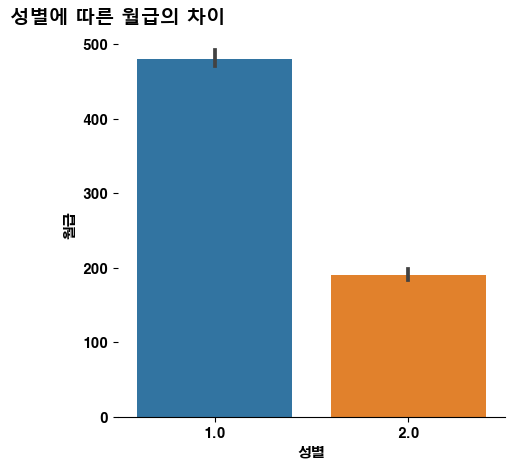

In [141]:
# 1. 남, 2.여
plt.figure(figsize=(5, 5))
sns.barplot(x='성별', y='월급', data=korea)
sns.despine(left=True) # 위, 오른쪽 축 숨기기
plt.title('성별에 따른 월급의 차이', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.show()

## 2. 나이대에 따른 월급의 차이

In [143]:
korea['태어난 년 도'].unique()

array([1945, 1948, 1942, 1962, 1940, 1970, 1978, 1941, 1964, 1975, 1961,
       1952, 1984, 1971, 1943, 1972, 1954, 1936, 1968, 1976, 1937, 1959,
       1955, 1982, 1973, 1950, 1930, 1947, 1980, 1946, 1965, 1958, 1960,
       1987, 1967, 1957, 1983, 1989, 1939, 1966, 1938, 1969, 1953, 1979,
       1934, 1932, 1951, 1933, 1977, 1944, 1974, 1963, 1991, 1992, 1997,
       1994, 1986, 1981, 1935, 1956, 1926, 1949, 1995, 1993, 1996, 1990,
       1929, 1988, 1985, 1931, 1998, 2000, 2003, 1922, 1928, 1999, 2001,
       1925, 1927, 2002], dtype=int64)

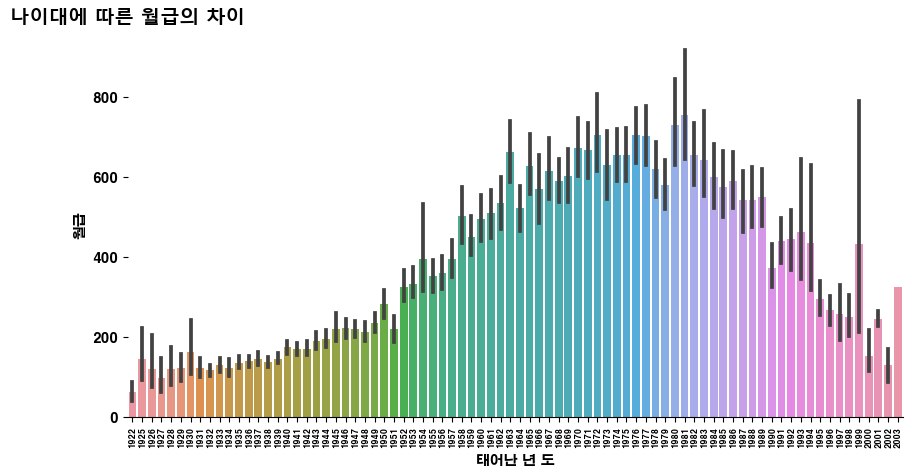

In [142]:
plt.figure(figsize=(10, 5))
sns.barplot(x='태어난 년 도', y='월급', data=korea)
sns.despine(left=True) # 위, 오른쪽 축 숨기기
plt.title('나이대에 따른 월급의 차이', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.xticks(rotation=90, fontsize=6)
plt.show()

## 3. 연령대별 성별에 따른 월급 차이

<Figure size 1000x500 with 0 Axes>

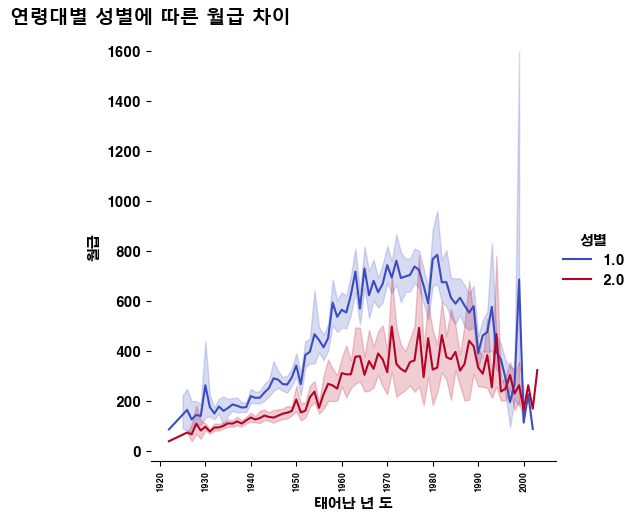

In [158]:
plt.figure(figsize=(10, 5))
sns.relplot(x='태어난 년 도', y='월급', data=korea, hue='성별', kind='line', palette='coolwarm')
sns.despine(left=True) # 위, 오른쪽 축 숨기기
plt.title('연령대별 성별에 따른 월급 차이', fontsize=14, fontfamily='Malgun Gothic', fontweight='bold', position=(0, 0))
plt.xticks(rotation=90, fontsize=6)
plt.show()